In [1]:
import pandas as pd
import plotly.express as px

df_restaurant = pd.read_csv("../data/processed/restaurant.csv")
df_transit = pd.read_csv("../data/processed/transit_stops.csv")

df_restaurant_plot = df_restaurant[["NAME", "CITY", "LONGITUDE", "LATITUDE"]].copy()
df_transit_plot = df_transit[["ID", "CITY", "LONGITUDE", "LATITUDE"]].copy()

df_restaurant_plot = df_restaurant_plot.rename(columns={"NAME":"NAME/ID"})
df_transit_plot = df_transit_plot.rename(columns={"ID":"NAME/ID"})

df_restaurant_plot['COLOR'] = 'red'
df_transit_plot['COLOR'] = 'green'

df_plot = pd.concat([df_restaurant_plot, df_transit_plot])

fig = px.scatter_mapbox(df_plot, lat="LATITUDE", lon="LONGITUDE", hover_name="NAME/ID", hover_data=["NAME/ID", "CITY"],
                    color_discrete_sequence=[df_plot.COLOR], zoom=9, height=300)


baricenter distante between distribution restaurant and distribution transit = 268.22281174501404


spread distance between of distribution restaurant and distribution transit= 1.488846748135984


joined metric distance between distribution restaurant and distribution transit= 81.5090362471994


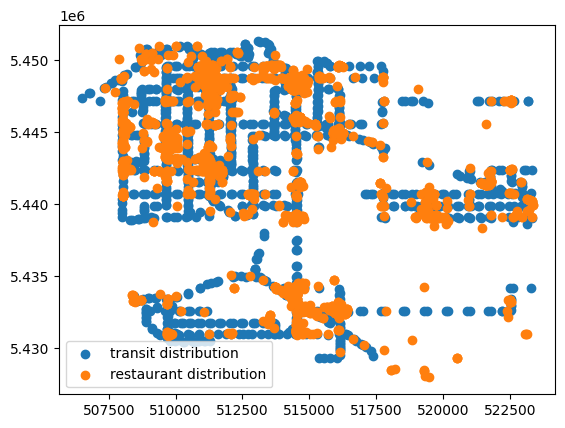

In [7]:
from matplotlib import pyplot as plt
import numpy as np
##source: https://datascience.stackexchange.com/questions/33081/similarity-between-two-scatter-plots
# In meter

restaurant_scatter_data = df_restaurant[["UTMX", "UTMY"]].copy()
surrey_transit_stop = df_transit[df_transit['CITY'] == 'SURREY']
transit_scatter_data = surrey_transit_stop[["UTMX", "UTMY"]].copy()

restaurant_scatter_x = restaurant_scatter_data[["UTMX"]].to_numpy()
restaurant_scatter_y = restaurant_scatter_data[["UTMY"]].to_numpy()
transit_scatter_x = transit_scatter_data[["UTMX"]].to_numpy()
transit_scatter_y = transit_scatter_data[["UTMY"]].to_numpy()


plt.scatter(transit_scatter_x, transit_scatter_y, label='transit distribution')
plt.scatter(restaurant_scatter_x, restaurant_scatter_y, label='restaurant distribution')

plt.legend()


#calculate baricenters
bc_restaurant=np.mean([restaurant_scatter_x, restaurant_scatter_y])
bc_transit=np.mean([transit_scatter_x, transit_scatter_y])

#calculate the distance between baricenters
dist_restaurant_transit=np.linalg.norm(bc_transit-bc_restaurant)

print("baricenter distante between distribution restaurant and distribution transit =", dist_restaurant_transit )
print ("\n")

#calculate the spread of the distributions, e.g. their standard deviation
spread_restaurant=np.std([restaurant_scatter_x, restaurant_scatter_y])
spread_transit=np.std([transit_scatter_x, transit_scatter_y])

dist_spread_b_c=np.abs(spread_transit-spread_restaurant)
print("spread distance between of distribution restaurant and distribution transit=", dist_spread_b_c)
print ("\n")

#put in a single metric. NB, the paramenter of this join is subjective, and depend on the usecase
#alpha=0 : don't care about the euclidean distance between the baricenters
#alpha=1 : don't care about the spread distance between the baricenters

alpha=0.3
joint_metric_a_b=alpha*dist_restaurant_transit + (1-alpha)*dist_spread_b_c

print("joined metric distance between distribution restaurant and distribution transit=", joint_metric_a_b)
